In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import ConvertToNumpyArray
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, RocCurveDisplay
print("All core libraries imported successfully")

All core libraries imported successfully


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns

Index(['activity', 'smiles'], dtype='str')

In [4]:
print("Columns in dataset:", df.columns)
print(df.head())

Columns in dataset: Index(['activity', 'smiles'], dtype='str')
   activity                                             smiles
0         1  CC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@...
1         0      CCCc1c(OCCCOc2ccc(OCC(=O)O)cc2)ccc(C(C)=O)c1O
2         0  C=C(C)C(=O)OCC(O)COc1ccc(C(C)(C)c2ccc(OCC(O)CO...
3         0                               C=C(C)CS(=O)(=O)[O-]
4         1                     Cc1ccc2c(c1N)C(=O)c1ccccc1C2=O


In [5]:
def mol_to_fp(smiles, radius=2, nBits=1024):
    """
    Convert a SMILES string to a Morgan fingerprint (ECFP) as a NumPy array.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(nBits)  # handle invalid SMILES
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    arr = np.zeros((nBits,), dtype=int)
    ConvertToNumpyArray(fp, arr)
    return arr

In [6]:
X = np.array([mol_to_fp(smi) for smi in df['smiles']])
y = df['activity'].values  # replace 'activity' if your column has a different name

print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)

Feature matrix X shape: (199, 1024)
Target vector y shape: (199,)


[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerator
[08:38:11] DEPRECATION WARNING: please use MorganGenerat

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
clf = RandomForestClassifier(n_estimators=199, random_state=42)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",199
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [9]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # probability of positive class

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

In [10]:
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {auc:.4f}")

Accuracy: 0.8250
ROC AUC: 0.7801


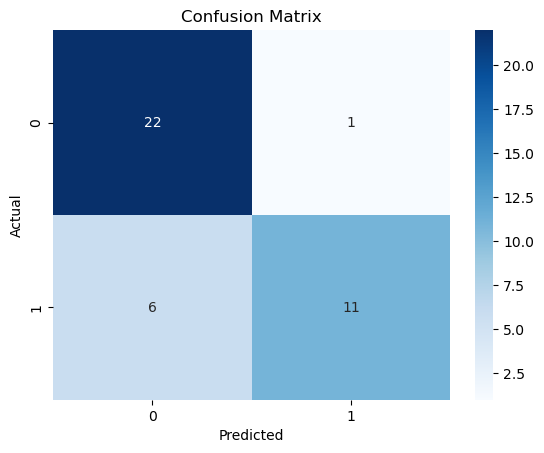

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

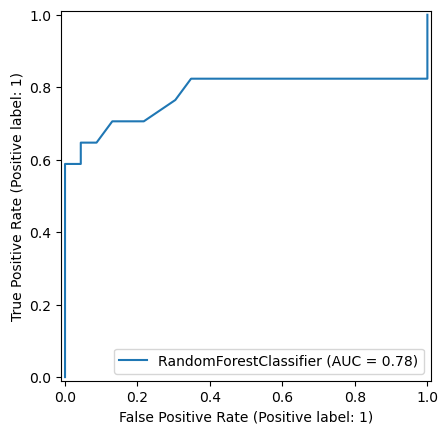

In [12]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [13]:
importances = clf.feature_importances_
top_indices = np.argsort(importances)[-10:][::-1]

print("Top 10 fingerprint bits:", top_indices)
print("Importance scores:", importances[top_indices])

Top 10 fingerprint bits: [745 289 408 807 578 754 714 157 455 673]
Importance scores: [0.03378535 0.02529392 0.02112928 0.01830576 0.01649583 0.01344439
 0.01331026 0.0111292  0.01050856 0.00938155]


In [27]:

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['activity'])


X_train = np.array([mol_to_fp(smi) for smi in df_train['smiles']])
y_train = df_train['activity'].values

X_test = np.array([mol_to_fp(smi) for smi in df_test['smiles']])
y_test = df_test['activity'].values


[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerator
[09:23:43] DEPRECATION WARNING: please use MorganGenerat

In [30]:

y_prob = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)


test_df = df_test.copy()
test_df['predicted_activity'] = y_pred
test_df['predicted_prob'] = y_prob


top_predicted = test_df.sort_values(by='predicted_prob', ascending=False)
top_10 = top_predicted.head(10)
print(top_10[['smiles', 'predicted_prob']])


num_predicted_active = (test_df['predicted_activity'] == 1).sum()
print(f"Number of compounds predicted active: {num_predicted_active}")


                                                smiles  predicted_prob
73   CC(=O)Oc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2(C)[C...        0.979899
7    CCCCCCCCCC(=O)O[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O...        0.949749
164  C[C@]12CC[C@@H]3[C@H]4CCC(=O)C=C4CC[C@H]3[C@@H...        0.934673
174  C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@...        0.919598
69                         CCCCC(CC)COC(=O)c1ccc(O)cc1        0.894472
175  C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc(OC5CCCC5)ccc4...        0.889447
114                          O=C(c1ccccc1)c1ccc(O)cc1O        0.773869
167                               Oc1ccc(Nc2ccccc2)cc1        0.768844
70                          CC(C)(c1ccccc1)c1ccc(O)cc1        0.713568
22   C[C@]12CCC(=O)C[C@@H]1CC[C@@H]1[C@@H]2CC[C@@]2...        0.698492
Number of compounds predicted active: 12


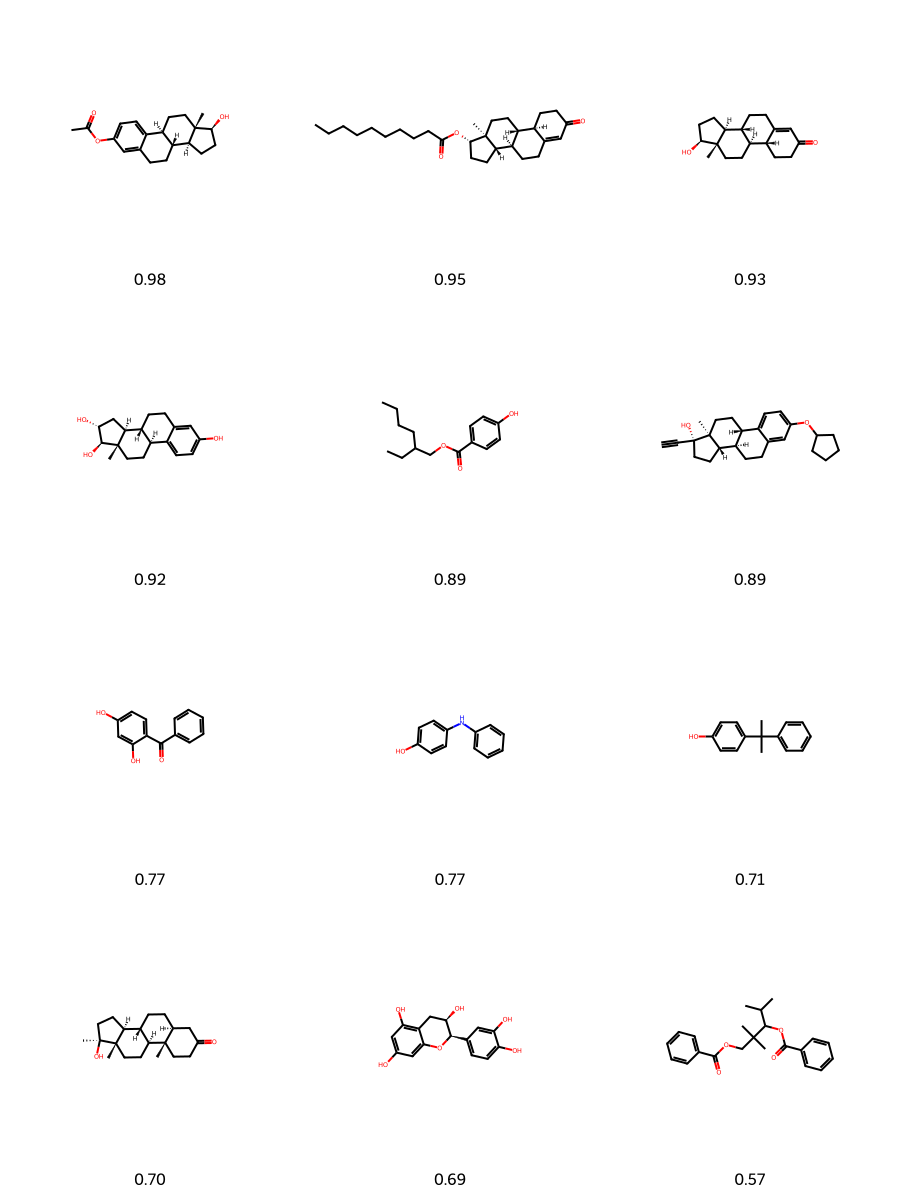

In [29]:
from rdkit import Chem
from rdkit.Chem import Draw


predicted_active_df = top_predicted[top_predicted['predicted_activity'] == 1]


mols = [Chem.MolFromSmiles(smi) for smi in predicted_active_df['smiles']]


legends = [f"{p:.2f}" for p in predicted_active_df['predicted_prob']]


Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,300), legends=legends)


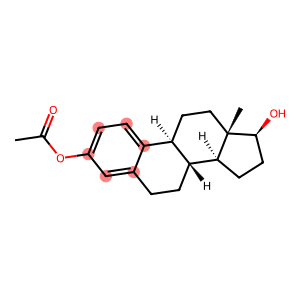

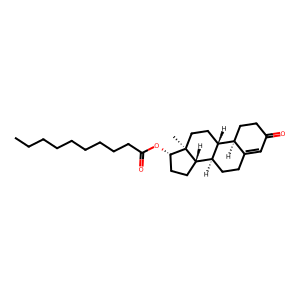

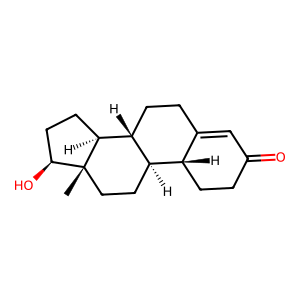

In [26]:
from rdkit.Chem import rdMolDescriptors

for smi in top_smiles[:3]:
    mol = Chem.MolFromSmiles(smi)
    aromatic_atoms = [a.GetIdx() for a in mol.GetAtoms() if a.GetIsAromatic()]
    display(Draw.MolToImage(mol, highlightAtoms=aromatic_atoms))